### Project 3: Regression

### Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m
from matplotlib import pyplot as plt

### Understanding the Dataset

In [110]:
train_df = pd.read_csv("train.csv")

In [111]:
train_df.shape

(1460, 81)

In [112]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [113]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Checking for null values 

In [114]:
train_nulls = train_df.isna().sum()[train_df.isna().sum() > 1]
train_nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [115]:
# Dropping the null values 
train_df.dropna(axis = 1, inplace = True)

In [116]:
cat_cols = list(train_df.nunique()[train_df.nunique() < len(train_df)/5].index)

In [117]:
len(cat_cols)

52

In [118]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [119]:
# constructing data frame of only categorical columns 
catCol_df = train_df.filter(items = cat_cols)

In [120]:
# constructing data frame of only continuous columns 
df_num = train_df.filter(items=list(set(train_df.columns) - set(cat_cols)))
df_num.fillna(value = 0, inplace = True)

In [121]:
df_num.isna().any()

GarageArea     False
GrLivArea      False
Id             False
LotArea        False
SalePrice      False
BsmtFinSF1     False
2ndFlrSF       False
BsmtUnfSF      False
1stFlrSF       False
TotalBsmtSF    False
dtype: bool

<AxesSubplot:>

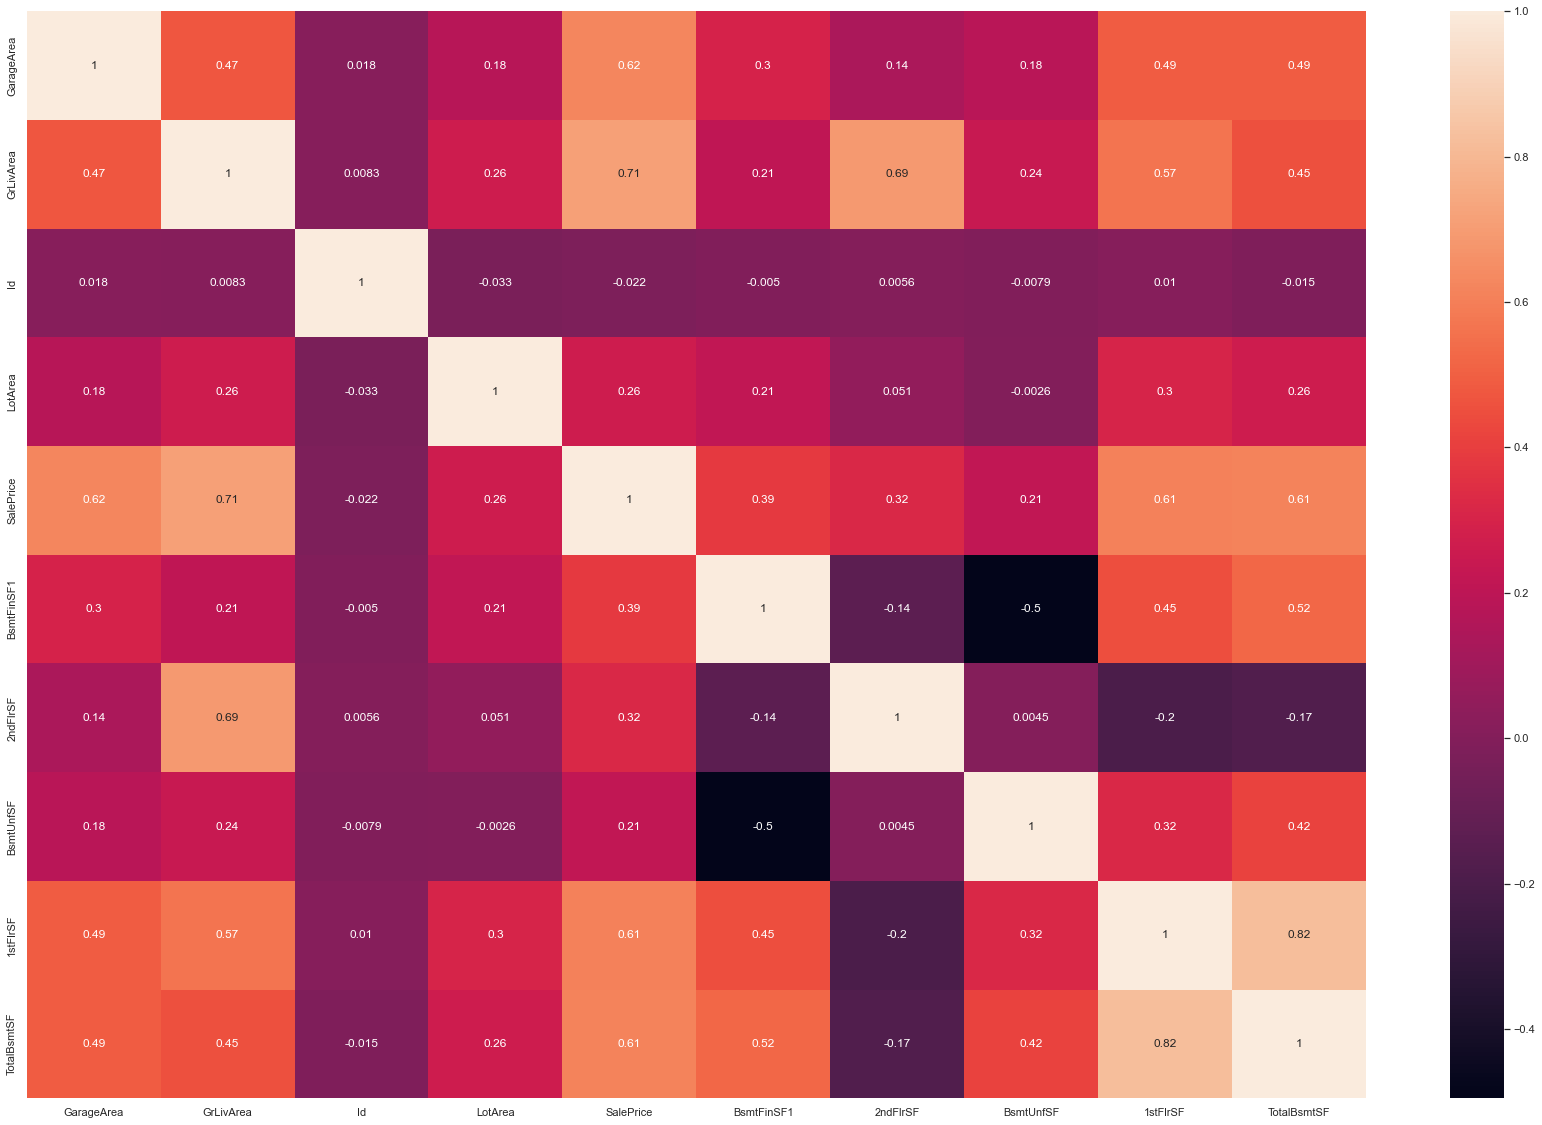

In [142]:
### Data Visualization
corr = df_num.corr() # allows us to get the correlations
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(corr, annot=True)

### Modeling

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
X = df_num.drop(columns = 'SalePrice',axis=1)
Y = df_num.SalePrice

In [124]:
linearModel1 = LinearRegression().fit(X_train, Y_train)

In [137]:
count = 0
for i in range(0, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) 
    linearModel1.fit(X_train, Y_train)
    count = count + linearModel1.score(X_test, Y_test)
    
print ('Coefficient of Determination:', (count/1000))


Coefficient of Determination: 0.6373561710912743


In [138]:
### Displaying a summary of the regression values

### import statsmodels.api as sm

### X_train = sm.add_constant(X_train)
### results = sm.OLS(Y_train, X_train).fit()
### results.summary()

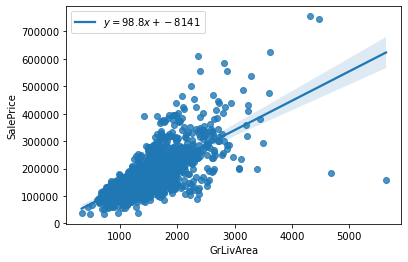

In [139]:
plot_rnet = sns.regplot(data = df_num, x = 'GrLivArea', y = 'SalePrice', line_kws = {
                                                                           'label':'$y=%5.4sx+%5.5s$'%(linearModel1.fit(X_train, Y_train).coef_[0],linearModel1.fit(X_train, Y_train).intercept_)})
plt.legend()

### Predictions

In [140]:
from sklearn import metrics

y_pred = linearModel1.fit(X_train, Y_train).predict(X_test)

meanAbsError = metrics.mean_absolute_error(Y_test, y_pred)
meanSqrError = metrics.mean_squared_error(Y_test, y_pred)
rootMeanSqrError = metrics.mean_squared_error(Y_test, y_pred,squared = False)

print('Mean Absolute Error:', meanAbsError)
print('Mean Square Error:', meanSqrError)
print('Root Mean Square Error:', rootMeanSqrError)

Mean Absolute Error: 27456.004999368302
Mean Square Error: 1812380471.6911058
Root Mean Square Error: 42572.06210287571


### Experiment 2

In [144]:
df_obj = train_df.select_dtypes(include=['object']).copy()
list(df_obj)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [156]:
# Covert categorical into numerical values
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()

train_df.MSZoning= labelEncoder.fit_transform(train_df.MSZoning)
train_df.Street= labelEncoder.fit_transform(train_df.Street)
train_df.LotShape= labelEncoder.fit_transform(train_df.LotShape)
train_df.LandContour= labelEncoder.fit_transform(train_df.LandContour)
train_df.Utilities= labelEncoder.fit_transform(train_df.Utilities)
train_df.LotConfig= labelEncoder.fit_transform(train_df.LotConfig)
train_df.LandSlope= labelEncoder.fit_transform(train_df.LandSlope)
train_df.Neighborhood= labelEncoder.fit_transform(train_df.Neighborhood)
train_df.Condition1= labelEncoder.fit_transform(train_df.Condition1)
train_df.Condition2= labelEncoder.fit_transform(train_df.Condition2)
train_df.BldgType= labelEncoder.fit_transform(train_df.BldgType)
train_df.HouseStyle= labelEncoder.fit_transform(train_df.HouseStyle)
train_df.RoofStyle= labelEncoder.fit_transform(train_df.RoofStyle)
train_df.RoofMatl= labelEncoder.fit_transform(train_df.RoofMatl)
train_df.Exterior1st= labelEncoder.fit_transform(train_df.Exterior1st)
train_df.Exterior2nd= labelEncoder.fit_transform(train_df.Exterior2nd)
train_df.ExterQual= labelEncoder.fit_transform(train_df.ExterQual)
train_df.ExterCond= labelEncoder.fit_transform(train_df.ExterCond)
train_df.Foundation= labelEncoder.fit_transform(train_df.Foundation)
train_df.Heating= labelEncoder.fit_transform(train_df.Heating)
train_df.HeatingQC= labelEncoder.fit_transform(train_df.HeatingQC)
train_df.CentralAir= labelEncoder.fit_transform(train_df.CentralAir)
train_df.KitchenQual= labelEncoder.fit_transform(train_df.KitchenQual)
train_df.Functional= labelEncoder.fit_transform(train_df.Functional)
train_df.PavedDrive= labelEncoder.fit_transform(train_df.PavedDrive)
train_df.SaleType= labelEncoder.fit_transform(train_df.SaleType)
train_df.SaleCondition= labelEncoder.fit_transform(train_df.SaleCondition)

train_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [157]:
# Seperate our features from the target in our full featured dataset
X2 = train_df.drop(columns = ['SalePrice'])
Y2 = train_df['SalePrice']

In [158]:
linearModel2 = LinearRegression().fit(X_train, Y_train)

In [159]:
count2 = 0
for i in range(0, 1000):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3) 
    linearModel2.fit(X2_train, Y2_train)
    count2 = count2 + linearModel2.score(X2_test, Y2_test)
    
print ('Coefficient of Determination:', (count2/1000))

Coefficient of Determination: 0.7764141713946754


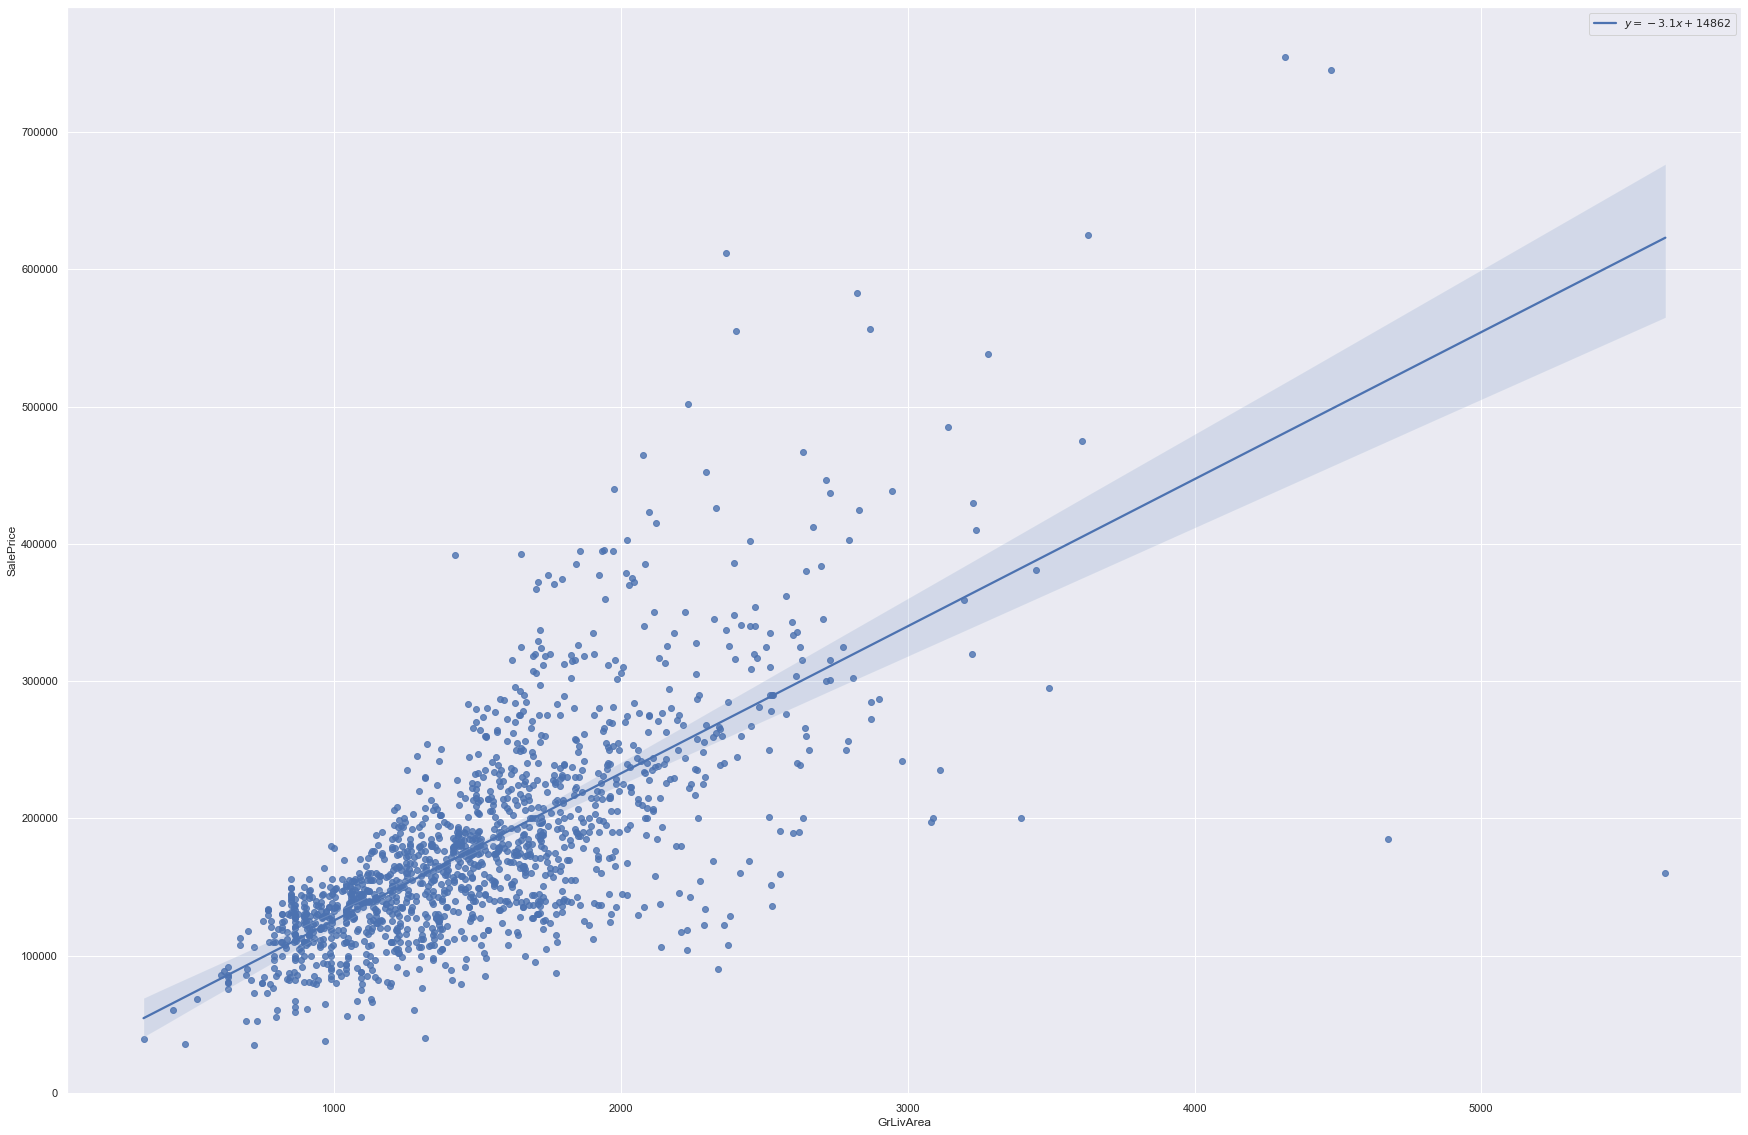

In [160]:
plot_rnet = sns.regplot(data = df_num, x = 'GrLivArea', y = 'SalePrice', line_kws = {
                                                                           'label':'$y=%5.4sx+%5.5s$'%(linearModel2.fit(X2_train, Y2_train).coef_[0],linearModel2.fit(X2_train, Y2_train).intercept_)})
plt.legend()

In [161]:
from sklearn import metrics

Y2_pred = linearModel1.fit(X2_train, Y2_train).predict(X2_test)

meanAbsError = metrics.mean_absolute_error(Y2_test, Y2_pred)
meanSqrError = metrics.mean_squared_error(Y2_test, Y2_pred)
rootMeanSqrError = metrics.mean_squared_error(Y2_test, Y2_pred,squared = False)

print('Mean Absolute Error:', meanAbsError)
print('Mean Square Error:', meanSqrError)
print('Root Mean Square Error:', rootMeanSqrError)

Mean Absolute Error: 21820.241173148122
Mean Square Error: 1602605487.0388331
Root Mean Square Error: 40032.555339858496


### Experiment 3

In [165]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0) 


from sklearn.ensemble import RandomForestRegressor

# initialize Random Forest regression model
rfr_model = RandomForestRegressor(n_estimators = 1000, random_state = 0)

# fit the model with our X and y
rfr_model = rfr_model.fit(X2_train, Y2_train)

print('Random Forest Regression Model (all features)')

#Get our coefficient of determination
print('Coefficient of Determination:',rfr_model.score(X2_test, Y2_test))



Random Forest Regression Model (all features)
Coefficient of Determination: 0.8735823973068894
Root Mean Square Error: 29295.870403020945


### Predictions 

In [170]:
Y2_pred = rfr_model.predict(X2_test)

meanAbsError = metrics.mean_absolute_error(Y2_test, Y2_pred)
meanSqrError = metrics.mean_squared_error(Y2_test, Y2_pred)
rootMeanSqrError = metrics.mean_squared_error(Y2_test, Y2_pred,squared = False)

print('Mean Absolute Error:', meanAbsError)
print('Mean Square Error:', meanSqrError)
print('Root Mean Square Error:', rootMeanSqrError)

Mean Absolute Error: 16927.673897260272
Mean Square Error: 858248022.6705985
Root Mean Square Error: 29295.870403020945
